<a href="https://colab.research.google.com/github/MHaley206265/DS-Unit-1-Sprint-2-Statistics/blob/master/Matt_Haley_DSPT6_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# Imports
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:

# load data into data frame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

column_headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
                  'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

crx = pd.read_csv(url,
                  header = None,
                  names = column_headers,
                  na_values = '?')

crx.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [13]:
# look for missing values
for i in crx:
  print(crx[i].value_counts())

b    468
a    210
Name: A1, dtype: int64
22.67    9
20.42    7
24.50    6
22.50    6
25.00    6
        ..
44.83    1
60.58    1
50.08    1
34.58    1
28.33    1
Name: A2, Length: 349, dtype: int64
1.500     21
0.000     19
3.000     19
2.500     19
1.250     16
          ..
12.125     1
13.915     1
22.000     1
12.835     1
10.915     1
Name: A3, Length: 215, dtype: int64
u    519
y    163
l      2
Name: A4, dtype: int64
g     519
p     163
gg      2
Name: A5, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64
v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64
0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
3.960     1
2.040     1
1.040     1
4.165     1
5.375     1
Name: A8, Length: 132, dtype: int64
t    361
f    329
Name: A9, dtype: int64
f    395
t    295
Name: A10, dtype:

In [14]:
# Check the Shape
crx.shape

# The shape matches what the site says it should have: 690 instances, 15 attributes,
# and 1 class attribute

(690, 16)

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# splitting dataframe into + and - dataframe

crx_plus = crx[crx['A16']=='+'].dropna()
crx_minus = crx[crx['A16']=='-'].dropna()

crx_split = [crx_plus, crx_minus]

In [22]:
# lets look at the pvalues of the continues variables

continuous = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

for i in crx:
  if i in continuous:
    print(f'The p-value of category {i} is {stats.ttest_ind(crx_plus[i], crx_minus[i]).pvalue}')

The p-value of category A2 is 3.5636710933835225e-06
The p-value of category A3 is 9.310154396147606e-08
The p-value of category A8 is 2.4079238505859142e-18
The p-value of category A11 is 2.5864649620278843e-27
The p-value of category A14 is 0.029450100409286473
The p-value of category A15 is 9.003915641872878e-06


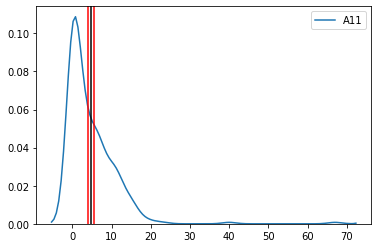

In [26]:
# After looking at the pvalues, I will look at A11 and A14.  I chose these to features
# because A11 has the smallest pvalue and A14 has the largest.

# starting with A11:

bayes_conf_int_plus = stats.bayes_mvs(crx_plus['A11'], .95)

sns.kdeplot(crx_plus['A11'])
plt.axvline(bayes_conf_int_plus[0][1][0], color = 'red')
plt.axvline(bayes_conf_int_plus[0][1][1], color = 'red')
plt.axvline(bayes_conf_int_plus[0][0], color = 'black')

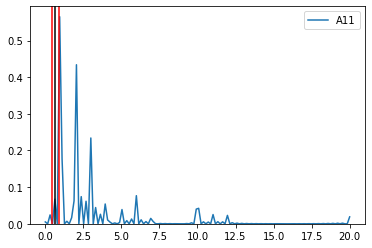

In [27]:
bayes_conf_int_minus = stats.bayes_mvs(crx_minus['A11'], .95)

sns.kdeplot(crx_minus['A11'])
plt.axvline(bayes_conf_int_minus[0][1][0], color = 'red')
plt.axvline(bayes_conf_int_minus[0][1][1], color = 'red')
plt.axvline(bayes_conf_int_minus[0][0], color = 'black')

In [0]:
# Looking at A11, the plus sample of the data has a skewed normal distribution with
# a long right tail.  The minus sample, however, does not seem to have a normal distribution.
# It would make sense that the difference in the two samples are statistically significant
# for this reason.

(Mean(statistic=164.6216216216216, minmax=(146.02828255958994, 183.2149606836533)), Variance(statistic=26600.74956184854, minmax=(22625.958584746488, 31261.82339724833)), Std_dev(statistic=162.95826026655936, minmax=(150.41927597467847, 176.81013375157073)))


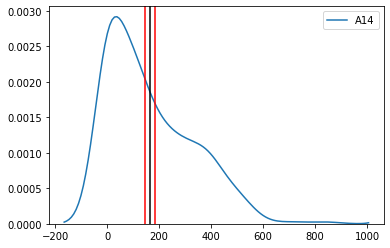

In [31]:
# looking at A14, starting with the plus sample
bayes_conf_int_plus = stats.bayes_mvs(crx_plus['A14'], .95)

print(bayes_conf_int_plus)

sns.kdeplot(crx_plus['A14'])
plt.axvline(bayes_conf_int_plus[0][1][0], color = 'red')
plt.axvline(bayes_conf_int_plus[0][1][1], color = 'red')
plt.axvline(bayes_conf_int_plus[0][0], color = 'black')

(Mean(statistic=193.40896358543418, minmax=(175.50011280688383, 211.31781436398452)), Variance(statistic=29771.192913323524, minmax=(25694.47097184631, 34483.90273526495)), Std_dev(statistic=172.42149791663508, minmax=(160.2949499262104, 185.6984187742721)))


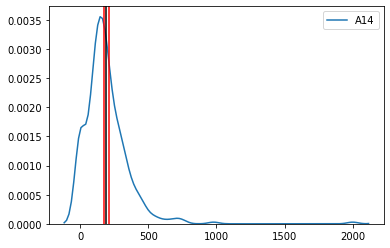

In [32]:
# and then the minus sample
bayes_conf_int_minus = stats.bayes_mvs(crx_minus['A14'], .95)

print(bayes_conf_int_minus)

sns.kdeplot(crx_minus['A14'])
plt.axvline(bayes_conf_int_minus[0][1][0], color = 'red')
plt.axvline(bayes_conf_int_minus[0][1][1], color = 'red')
plt.axvline(bayes_conf_int_minus[0][0], color = 'black')

In [0]:
# looking at these two sets of data from the samples, they have a similar mean, and similar
# confidence intervals, however, the data from the minus sample seems to have a much longer
# tail to the right

In [35]:
# lets look for interesting categorical tests
# start with A4
crx['A4'].value_counts()

u    519
y    163
l      2
Name: A4, dtype: int64

In [38]:
cross_A4 = pd.crosstab(crx['A16'], crx['A4'])
cross_A4

A4,l,u,y
A16,,,
+,2,256,45
-,0,263,118


In [41]:
# do a chi squared test on the A4 crosstab
chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A4)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))


Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  0.88596491 229.90789474  72.20614035]
 [  1.11403509 289.09210526  90.79385965]]


In [43]:
# Check A7

cross_A7 = pd.crosstab(crx['A16'], crx['A7'])
cross_A7

A7,bb,dd,ff,h,j,n,o,v,z
A16,,,,,,,,,
+,25,2,8,87,3,2,1,169,6
-,34,4,49,51,5,2,1,230,2


In [44]:
# cross tab on A7
chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A7)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 45.034207140240554
P-value: 3.625452872372267e-07
Degrees of Freedom: 8
Expected: 
 [[ 26.25110132   2.66960352  25.36123348  61.40088106   3.55947137
    1.77973568   0.88986784 177.52863436   3.55947137]
 [ 32.74889868   3.33039648  31.63876652  76.59911894   4.44052863
    2.22026432   1.11013216 221.47136564   4.44052863]]


In [45]:
# look at A5
cross_A5 = pd.crosstab(crx['A16'], crx['A5'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A5)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]]


In [46]:
# look at A6
cross_A6 = pd.crosstab(crx['A16'], crx['A6'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A6)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 98.32520342679135
P-value: 3.4999300402715717e-15
Degrees of Freedom: 13
Expected: 
 [[24.02643172 60.95594714 18.24229075 13.34801762 11.12334802 23.5814978
  26.25110132  4.44933921 22.69162996 16.90748899 34.70484581  1.33480176
  28.47577093 16.90748899]
 [29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.66519824
  35.52422907 21.09251101]]


In [47]:
# A9
cross_A9 = pd.crosstab(crx['A16'], crx['A9'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A9)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


In [48]:
# A10
cross_A10 = pd.crosstab(crx['A16'], crx['A10'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A10)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 143.06956205083145
P-value: 5.675727374527571e-33
Degrees of Freedom: 1
Expected: 
 [[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


In [49]:
# A12
cross_A12 = pd.crosstab(crx['A16'], crx['A12'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A12)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.568273300792113
P-value: 0.45094587758631943
Degrees of Freedom: 1
Expected: 
 [[166.40289855 140.59710145]
 [207.59710145 175.40289855]]


In [50]:
# and A13
cross_A13 = pd.crosstab(crx['A16'], crx['A13'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(cross_A13)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 9.191570451545383
P-value: 0.010094291370456362
Degrees of Freedom: 2
Expected: 
 [[278.07971014   3.55942029  25.36086957]
 [346.92028986   4.44057971  31.63913043]]


In [0]:
# After doing chi squared tests on the categorical data, it looks like
# A12 has the highest p_value and A9 has the lowest

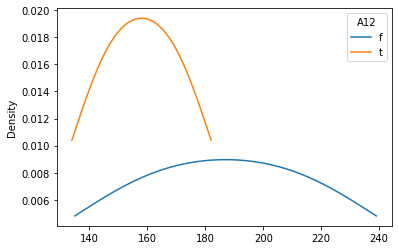

In [51]:
cross_A12.plot.kde()

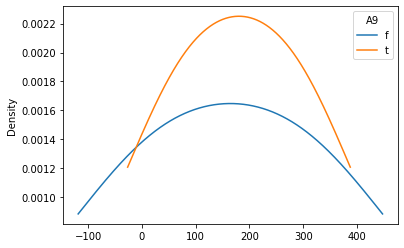

In [52]:
cross_A9.plot.kde()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###Continuous Features###
There were two continuous features that I decided to look at, A11 and A14.  For **A14**, when comparing the plus and minus samples, the p-value was 0.029450100409286473. This p-value indicates that the null hypothesis for A14 can be rejected with about a 97% certainty.  This means that the categories of plus and minus do have a statistical significance on the outcome of the feature and the difference in outcome is not random. Looking at **A11**, the p-value was 2.5864649620278843e-27. This p-value indicates that the null hpyothesis for A11 can be rejected with a very high degree of certainty, greater than 99.9%. This maeans that the plus and minus categories have a statistical significance on the outcome of the feature and it is extremely unlikely that the difference in the outcomes was random.

###Categorical Features###
There were two categorical features that I looked at: A9 and A12. Looking at **A9**, it had a p-value of 3.1185900878457007e-79 when comparing the plus and minus samples. This p-value indicates that the null hypothesis can be rejected with a degree of certainty greater than 99.9%. This indicates that the samples selected are not random, but rather, the impact of plus and minus is almost certainly statistically significant.  Looking at A12, however, shows a different picture. The p-value between plus and minus was 0.45094587758631943. This means that the null hypothesis for A12 cannot be rejected and must be upheld. It also implies that the differences between plus and minus are most likely random and that the classes have no statistically significant impact on the feature.

###Most Challenging?###
In my opinion, the most challenging part of this sprint challenge is trying to put the outcomes of the statistical tests into words.  By looking at the numbers, I am able to quickly come up with an interpretation in my head, but puting it into words for others to see can be challenging if they have no knowledge of statistics.  It is a fun challenge, however, and just another part of the puzzle that needs to be solved.

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



Bayesian and Frequentist statistics both try to look at the probability of something impacting something else, however, they have a fundamentally different approach to finding that information.  Frequentists try to find a sample of a population that is finite, and through testing a sample of that population, they are able to extrapolate the findings of the sample to the total population since the bounds of the population are known.  Bayesians, however, look more at the hypothesis and information about the hypothesis.  They then are able to start with the given information and form a better understanding of the hypothesis and any statistical significance by updating the information iteratively.  For this reason, Bayesian statistics doesn't requre as large of sample sizes.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.